<a href="https://colab.research.google.com/github/henriqueborgo/Solved_Cases/blob/main/Case_1_Roof_Imoveis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Business Understanding + Data Understanding

In [ ]:
# Loading libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reading the CSV
# Describing columns

houses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DEX/Cases_Resolvidos/kc_house_data.csv')
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# Treating the columns structure

houses.rename(columns={'sqft_living':'size_living',
                       'sqft_lot':'size_lot',
                       'sqft_above':'size_above',
                       'sqft_basement':'size_basement',
                       'sqft_living15':'size_living_15',
                       'sqft_lot15':'size_lot_15',
                       'long':'longitude',
                       'lat':'latitude'},inplace=True)
houses.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'size_living',
       'size_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'size_above', 'size_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'latitude', 'longitude', 'size_living_15', 'size_lot_15'],
      dtype='object')

Describing the metadata

*   id = Unique indentifier of the property
*   date = Data of Sale
*   price = Sale price
*   rooms = Nº of rooms
*   bathrooms = Nº of bathroons
*   size_living = Size of living area in ft²
*   size_lot = Plot size of living area in ft²
*   floors = Number of floors
*   seaside = Indicative if the property is by the sea
*   view = Degree of how beautiful the view of the property is
*   grid = Classification by quality of material used in the construction
*   size_above = Area above ground in ft²
*   size_basement = Area under ground in ft²
*   yr_built = Year of construction
*   yr_renov = Year of restoration, otherwise 0
*   zipcode Zip Code 5 - Similar to zip code
*   lat = Latitude
*   long = Longitude
*   size_liv15 = Average living area of the 15 closest properties, in ft²
*   size_lot15 = Average of the plot area of the 15 closest properties, in ft


# Data Preparation

In [ ]:
# Evaluating the usefull data
# Erasing latitude,longitude
# Adjusting the date sintax

houses.drop(['latitude','longitude'], axis=1, inplace=True)


houses['date_rev'] = houses['date'].str.replace('T000000','')
houses.drop(['date'],axis=1,inplace=True)
houses['date_rev'] = pd.to_datetime(houses['date_rev'],format='%Y%m%d',errors='coerce')
houses = houses[['id', 'date_rev', 'price', 'bedrooms', 'bathrooms', 'size_living',
       'size_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'size_above', 'size_basement', 'yr_built', 'yr_renovated', 'zipcode',
        'size_liv um um ing_15', 'size_lot_15']]

houses.head()

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,condition,grade,size_above,size_basement,yr_built,yr_renovated,zipcode,size_living_15,size_lot_15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [ ]:
# Evaluating the type of metadata in each column

houses.describe()

,id,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,condition,grade,size_above,size_basement,yr_built,yr_renovated,zipcode,size_living_15,size_lot_15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000


In [ ]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              21613 non-null  int64         
 1   date_rev        21613 non-null  datetime64[ns]
 2   price           21613 non-null  float64       
 3   bedrooms        21613 non-null  int64         
 4   bathrooms       21613 non-null  float64       
 5   size_living     21613 non-null  int64         
 6   size_lot        21613 non-null  int64         
 7   floors          21613 non-null  float64       
 8   waterfront      21613 non-null  int64         
 9   view            21613 non-null  int64         
 10  condition       21613 non-null  int64         
 11  grade           21613 non-null  int64         
 12  size_above      21613 non-null  int64         
 13  size_basement   21613 non-null  int64         
 14  yr_built        21613 non-null  int64         
 15  yr

In [ ]:
#How many different zipcodes I have in the dataset

houses['zipcode'].drop_duplicates().reset_index()

,index,zipcode
0,0,98178
1,1,98125
2,2,98028
3,3,98136
4,4,98074
...,...,...
65,286,98072
66,299,98188
67,350,98014
68,408,98055


In [ ]:
#list of cities at Washington by zipcode

wa_zipcode = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DEX/Cases_Resolvidos/usa_zipcode_of_wa.csv')
wa_zipcode = wa_zipcode[['zip','City','County Name','Zipcode name','State']]
wa_zipcode.rename(columns={'zip':'zipcode'},inplace=True)
wa_zipcode.dropna(how='any',inplace=True)
wa_zipcode['zipcode']=wa_zipcode['zipcode'].astype(int)
wa_zipcode.head()

,zipcode,City,County Name,Zipcode name,State
0,98520,ABERDEEN,GRAYS HARBOR,"ABERDEEN, WA",WA
1,98220,ACME,WHATCOM,"ACME, WA",WA
2,99101,ADDY,STEVENS,"ADDY, WA",WA
3,98522,ADNA,LEWIS,"ADNA, WA",WA
4,99001,AIRWAY HEIGHTS,SPOKANE,"AIRWAY HEIGHTS, WA",WA


In [ ]:
# add the city information to the houses dataframe by the wa_zipcode(list of cities by zipcode)

houses = houses.merge(wa_zipcode)
houses

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,size_basement,yr_built,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,1340,5650,SEATTLE,KING,"SEATTLE, WA",WA
1,4060000240,2014-06-23,205425.0,2,1.00,880,6780,1.0,0,0,...,0,1945,0,98178,1190,6780,SEATTLE,KING,"SEATTLE, WA",WA
2,4058801670,2014-07-17,445000.0,3,2.25,2100,8201,1.0,0,2,...,480,1967,0,98178,2660,8712,SEATTLE,KING,"SEATTLE, WA",WA
3,2976800796,2014-09-25,236000.0,3,1.00,1300,5898,1.0,0,0,...,0,1961,0,98178,1320,7619,SEATTLE,KING,"SEATTLE, WA",WA
4,6874200960,2015-02-27,170000.0,2,1.00,860,5265,1.0,0,0,...,0,1931,0,98178,1650,8775,SEATTLE,KING,"SEATTLE, WA",WA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,2525049086,2014-10-03,2720000.0,4,3.25,3990,18115,2.0,0,0,...,0,1989,0,98039,3450,16087,MEDINA,KING,"MEDINA, WA",WA
21609,2525049113,2014-07-25,1950000.0,4,3.50,4065,18713,2.0,0,0,...,0,1987,0,98039,3070,18713,MEDINA,KING,"MEDINA, WA",WA
21610,3262300485,2015-04-21,2250000.0,5,5.25,3410,8118,2.0,0,0,...,0,2006,0,98039,3410,16236,MEDINA,KING,"MEDINA, WA",WA
21611,6447300365,2014-11-13,2900000.0,5,4.00,5190,14600,2.0,0,1,...,0,2013,0,98039,3840,19250,MEDINA,KING,"MEDINA, WA",WA


In [ ]:
# Calculating the cost per area of the house

def price_area_living(row):
  return float(row['price']/row['size_living'])


houses['price/size_living'] =houses.apply(price_area_living, axis=1)
houses['price/size_living']

0        188.050847
1        233.437500
2        211.904762
3        181.538462
4        197.674419
            ...    
21608    681.704261
21609    479.704797
21610    659.824047
21611    558.766859
21612    492.084433
Name: price/size_living, Length: 21613, dtype: float64

In [ ]:
# Calculating the cost per area of the entire property

def price_area_lot(row):
  return float(row['price']/row['size_lot'])


houses['price/size_lot'] = houses.apply(price_area_lot, axis=1)
houses['price/size_lot']

0         39.274336
1         30.298673
2         54.261675
3         40.013564
4         32.288699
            ...    
21608    150.151808
21609    104.205632
21610    277.161863
21611    198.630137
21612    212.004092
Name: price/size_lot, Length: 21613, dtype: float64

In [ ]:
houses.columns

Index(['id', 'date_rev', 'price', 'bedrooms', 'bathrooms', 'size_living',
       'size_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'size_above', 'size_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'size_living_15', 'size_lot_15', 'City', 'County Name', 'Zipcode name',
       'State', 'price/size_living', 'price/size_lot'],
      dtype='object')

In [ ]:
# Setting that I don't want to pay more than price/size_living = 150$/ft² (based on GRAPH 2)
# Setting that better cost-benefit houses are newer than 1960 (based on GRAPH 4)
# Setting that cheaper houses have two or less floors
# Setting that I dont' want houses above condition 4 
# Setting that I want houses with more than 2 bedroomns
# Setting view better than 2

houses_adjust = houses[(houses['price/size_living']<150) & 
                       (houses['yr_built'] > 1960) &
                       (houses['floors'] <= 2) &
                       (houses['condition'] >=4) &
                       (houses['bathrooms'] >= 2) & 
                       (houses['view'] >= 2)] 

houses_adjust.sort_values('price/size_living',ascending=True,inplace=True)
houses_adjust.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
20607,2113700360,2014-06-27,315000.0,6,4.00,3120,4240,2.0,0,2,...,0,98106,1460,4240,SEATTLE,KING,"SEATTLE, WA",WA,100.961538,74.292453
2069,5152100060,2014-05-29,472000.0,6,2.50,4410,14034,1.0,0,2,...,0,98003,2600,13988,FEDERAL WAY,KING,"FEDERAL WAY, WA",WA,107.029478,33.632607
2430,8159300050,2015-03-12,355425.0,4,2.50,3238,9112,1.0,0,2,...,0,98198,3056,9668,SEATTLE,KING,"SEATTLE, WA",WA,109.766831,39.006255
10831,4167800130,2015-05-01,310000.0,5,2.25,2600,9600,1.0,0,2,...,0,98023,2070,9660,FEDERAL WAY,KING,"FEDERAL WAY, WA",WA,119.230769,32.291667
6836,3121069038,2015-03-26,355000.0,3,2.50,2620,78843,1.0,0,3,...,0,98092,2330,130244,AUBURN,KING,"AUBURN, WA",WA,135.496183,4.502619


Text(0.5, 1.0, 'GRAPH 1')

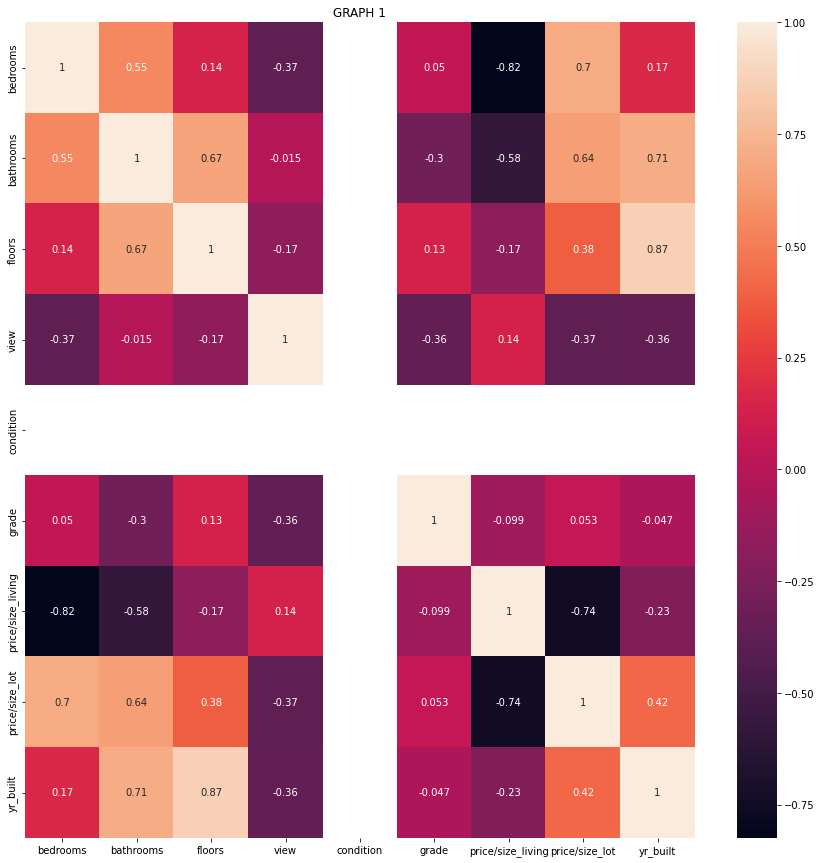

In [ ]:
# Verifing the correlations between the atributes

plt.figure(figsize=(15,15))
atributes = houses_adjust[['bedrooms','bathrooms','floors','view','condition', 'grade', 'price/size_living', 'price/size_lot','yr_built']]
atributes_corr = atributes.corr()
sns.heatmap(atributes_corr,annot=True).set_title('GRAPH 1')


* The **yr_built** doesn't have much correlation with the **price/size_living**, therefore, newer houses are more interesting to buy
* The **condition** doesn't have much correlation with the **price/size_living**, so, houses with better condition are worth it


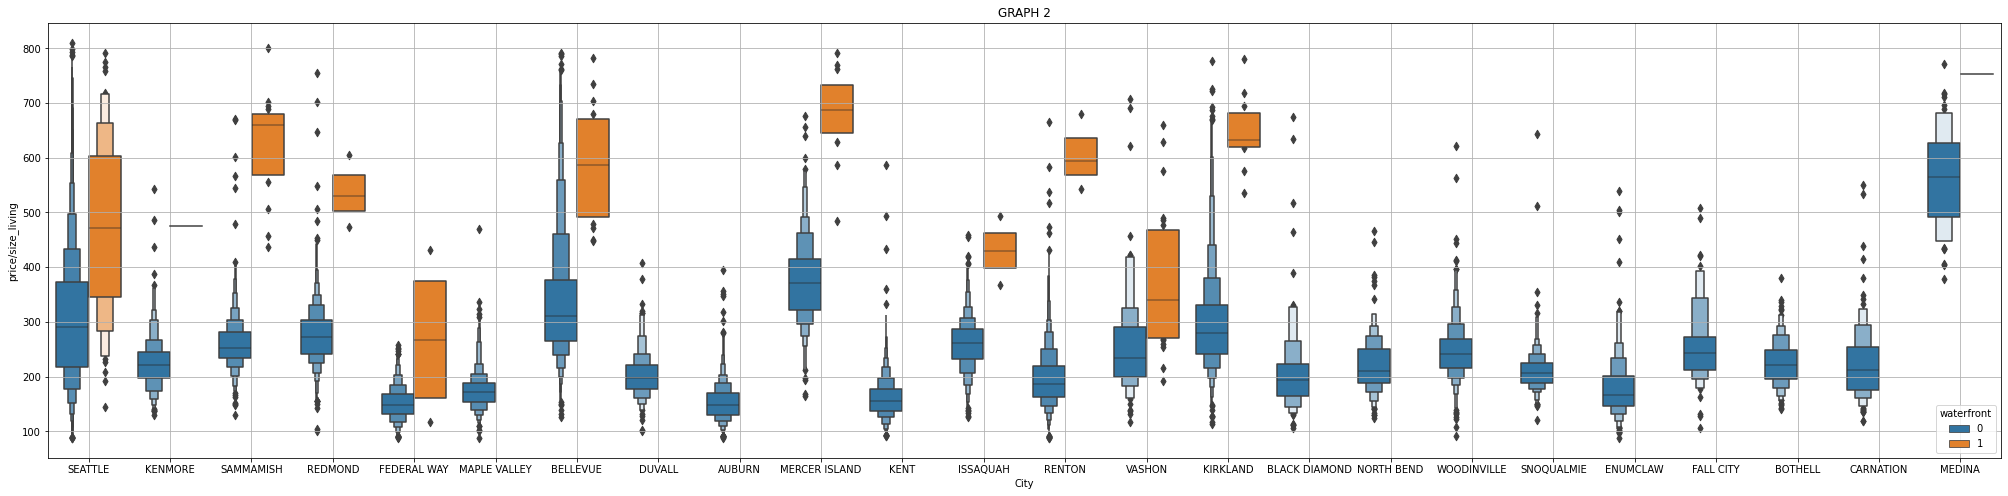

In [ ]:
# Verifying the correlation between the city and the price/m² of the property

plt.figure(figsize=(35,8))
sns.boxenplot(data=houses, x="City", y="price/size_living", hue="waterfront").set_title('GRAPH 2')
plt.grid()

* Federal Way, Maple Valley, Auburn, Kent e EnumClaw has the cheaper mean rate of price/m² (under 200$/f²) - good
* Medina has only expensive houses - bad

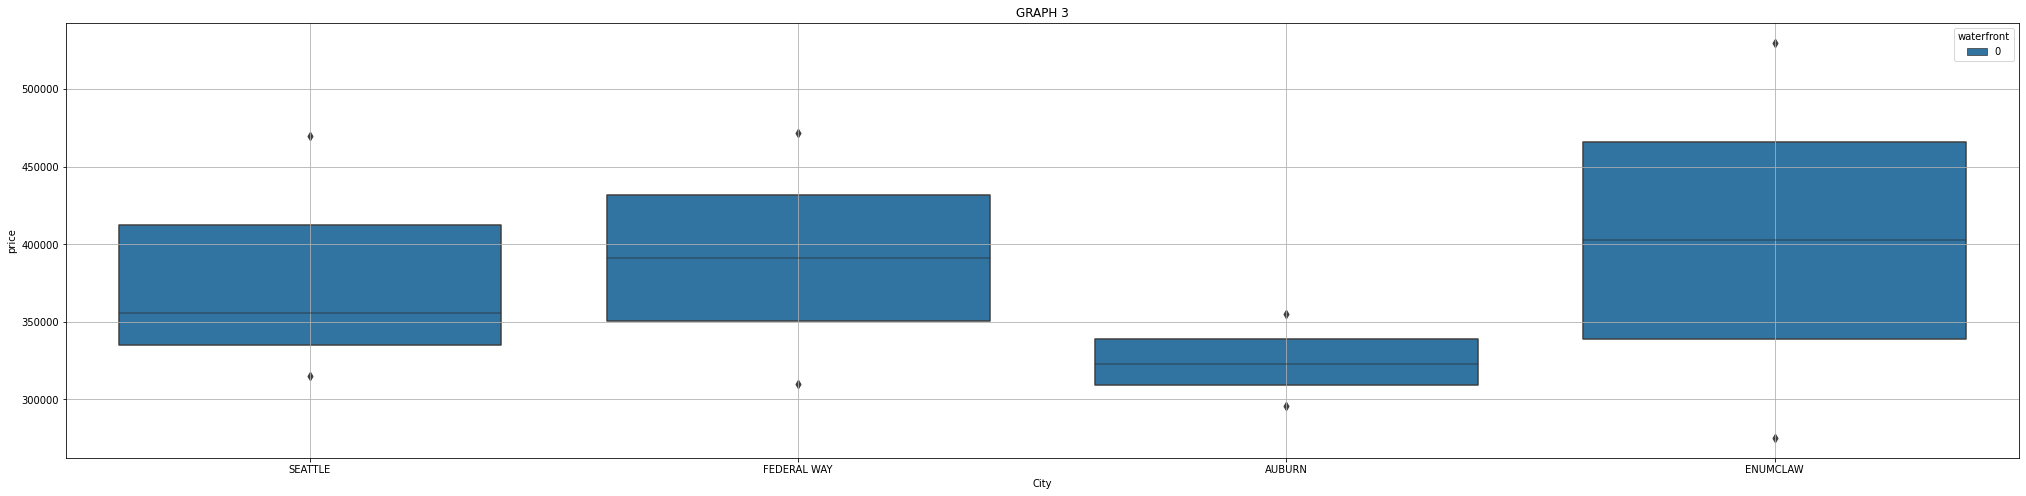

In [ ]:
# Verifying the correlation between the city and the price of the property (houses below 150$/ft²)

plt.figure(figsize=(35,8))
sns.boxenplot(data=houses_adjust, x="City", y="price", hue="waterfront").set_title('GRAPH 3')
plt.grid()

Comparing the two graphics above, it's possible to say:
* Sammamish and Redmond have houses not so cheap, but, with price/size_lot low - good
* Federal way, Maple, Valley, Auburn, Kent and Enumclay had low prices and low price/ft² (it can indicate low quality of the place) - bad
* Carnation has low prices, but high $/ft² - bad


Text(0.5, 1.0, 'GRAPH 4')

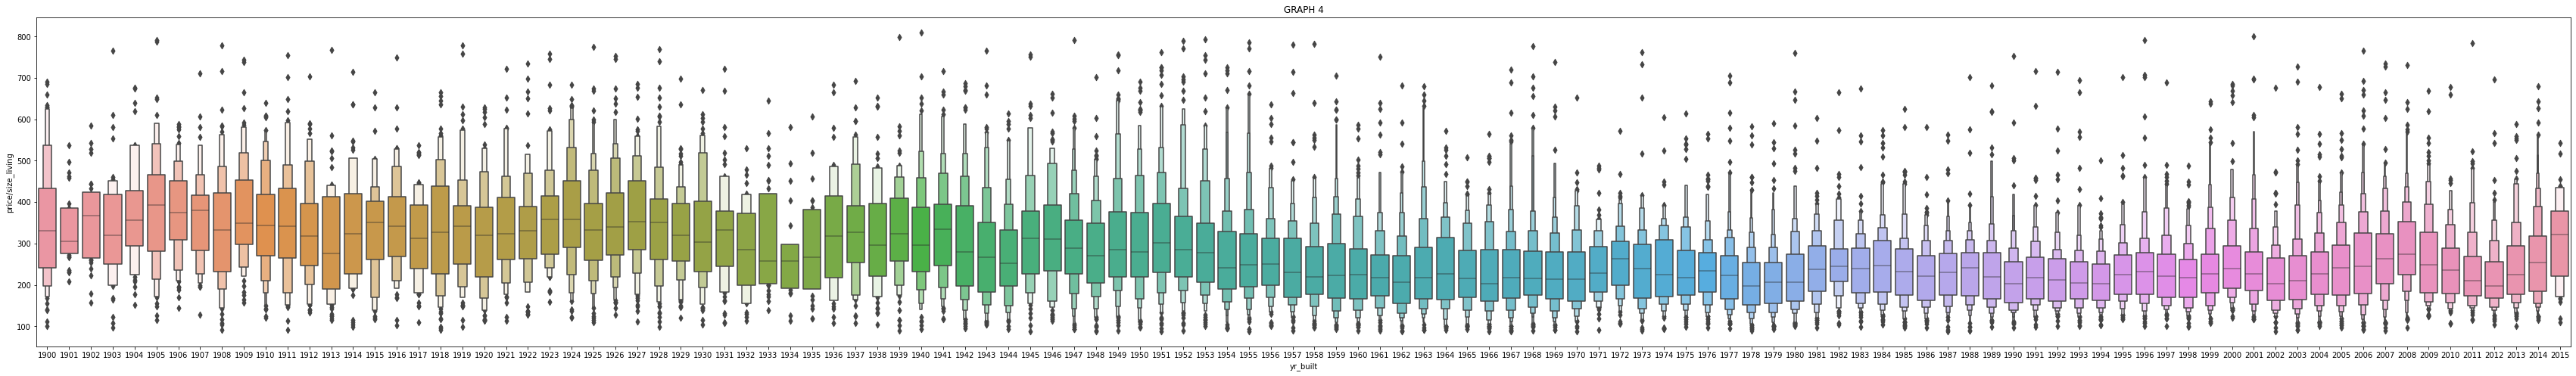

In [ ]:
# Verifying the correlation between the year built and the price/m² of the property

plt.figure(figsize=(60,8))
sns.boxenplot(data=houses, x="yr_built", y="price/size_living").set_title('GRAPH 4')

Houses built between 1960 and 2000 has a better mean rate of price/ft²

Text(0.5, 1.0, 'GRAPH 5')

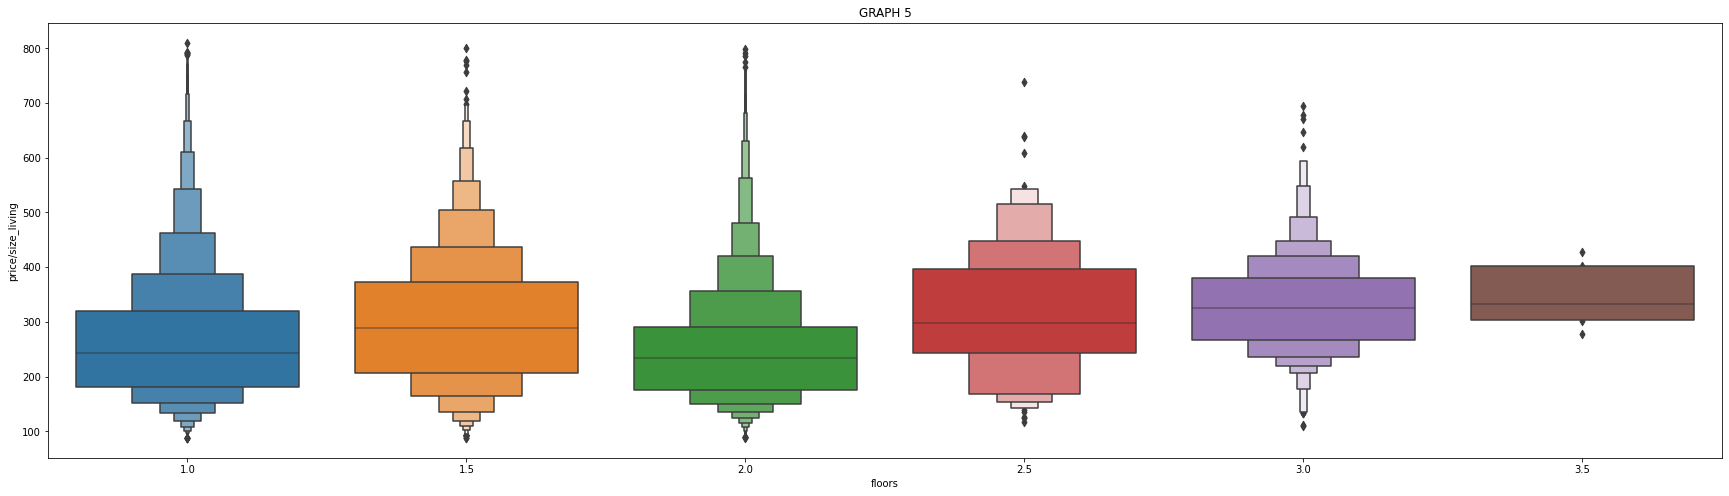

In [ ]:
# Verifying the correlation between the number of floors and the price/m² of the property

plt.figure(figsize=(30,8))
sns.boxenplot(data=houses, x="floors", y="price/size_living").set_title('GRAPH 5')

Houses bellow 2 floors are cheaper

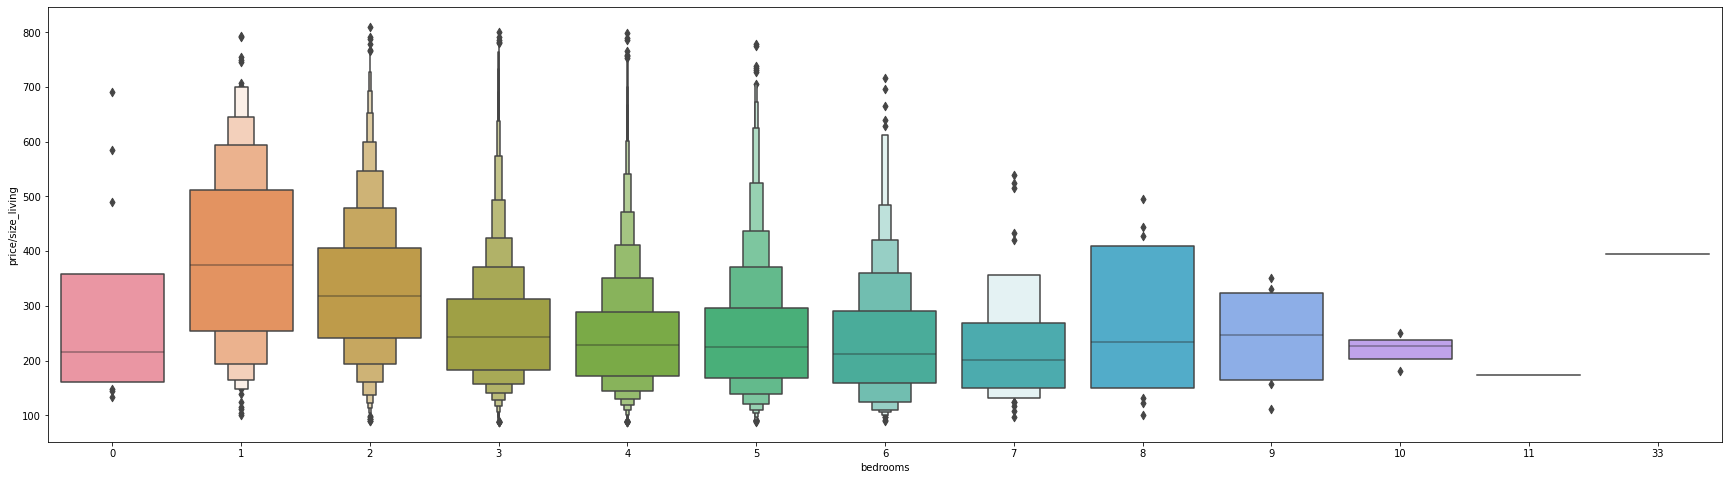

In [ ]:
# Verifying the correlation between the number of bedrooms and the price/m² of the property

plt.figure(figsize=(30,8))
sns.boxenplot(data=houses, x="bedrooms", y="price/size_living")

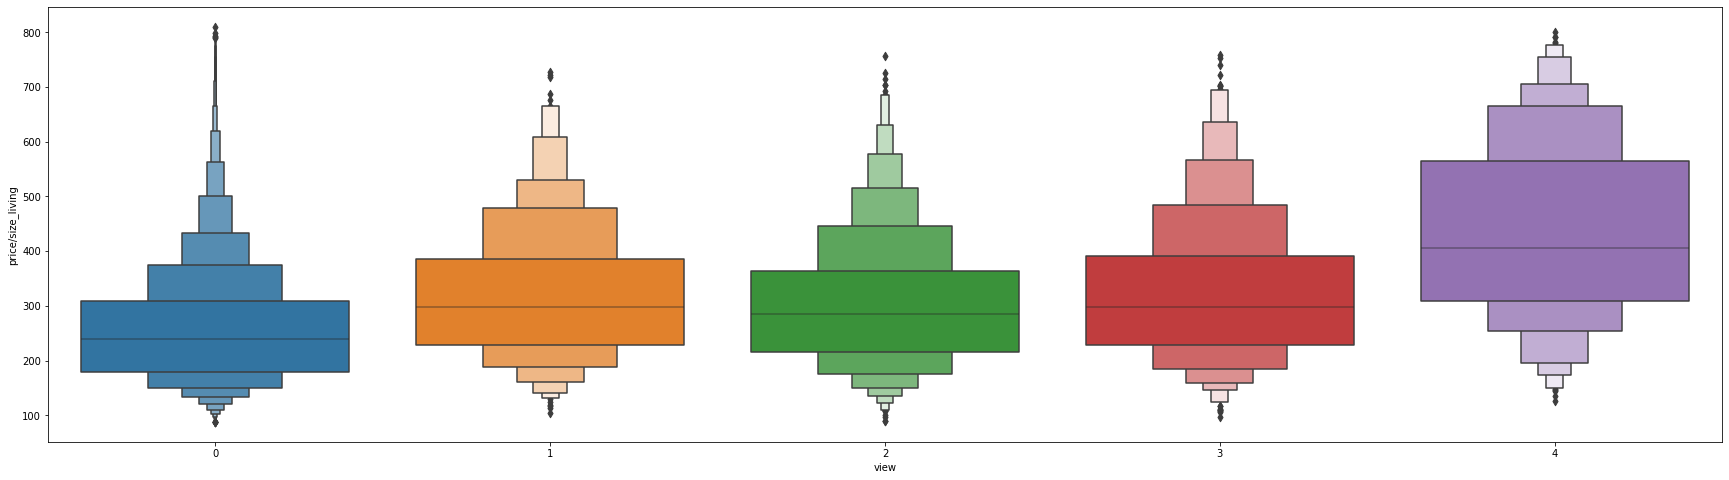

In [ ]:
# Verifying the correlation between the quality of view and the price/m² of the property

plt.figure(figsize=(30,8))
sns.boxenplot(data=houses, x="view", y="price/size_living")

In [ ]:
# Printing the houses that apear more than one time
# Verifying if the top 5 cheaper houses (houses_adjust) have been sold more then one time 

freq = houses['id'].value_counts()
freq_sold = freq[freq>1].index
freq_sold

houses_freq = houses[houses.id.isin(freq_sold)]

house_best_1 = houses_adjust[(houses_adjust['id'] == 2113700360)]
house_best_2 = houses_adjust[(houses_adjust['id'] == 5152100060)]
house_best_3 = houses_adjust[(houses_adjust['id'] == 8159300050)]
house_best_4 = houses_adjust[(houses_adjust['id'] == 4167800130)]
house_best_5 = houses_adjust[(houses_adjust['id'] == 3121069038)]

In [ ]:
houses_freq

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
6,3969300030,2014-07-23,165000.0,4,1.00,1000,7134,1.0,0,0,...,0,98178,1020,7138,SEATTLE,KING,"SEATTLE, WA",WA,165.000000,23.128680
7,3969300030,2014-12-29,239900.0,4,1.00,1000,7134,1.0,0,0,...,0,98178,1020,7138,SEATTLE,KING,"SEATTLE, WA",WA,239.900000,33.627698
190,7961500010,2014-08-06,245000.0,3,2.25,2210,10794,1.0,0,0,...,0,98178,2230,10753,SEATTLE,KING,"SEATTLE, WA",WA,110.859729,22.697795
191,7961500010,2015-03-04,520000.0,3,2.25,2210,10794,1.0,0,0,...,0,98178,2230,10753,SEATTLE,KING,"SEATTLE, WA",WA,235.294118,48.174912
227,1423049019,2014-05-23,90000.0,2,1.00,580,7500,1.0,0,0,...,0,98178,1700,11250,SEATTLE,KING,"SEATTLE, WA",WA,155.172414,12.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21493,4202400078,2015-04-28,335000.0,2,1.00,1410,7000,1.0,0,0,...,0,98055,1540,6000,RENTON,KING,"RENTON, WA",WA,237.588652,47.857143
21510,7200179,2014-10-16,150000.0,2,1.00,840,12750,1.0,0,0,...,0,98055,1480,6969,RENTON,KING,"RENTON, WA",WA,178.571429,11.764706
21511,7200179,2015-04-24,175000.0,2,1.00,840,12750,1.0,0,0,...,0,98055,1480,6969,RENTON,KING,"RENTON, WA",WA,208.333333,13.725490
21565,3262300940,2014-11-07,875000.0,3,1.00,1220,8119,1.0,0,0,...,0,98039,1910,8119,MEDINA,KING,"MEDINA, WA",WA,717.213115,107.771893


In [ ]:
house_best_1.head()

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
20607,2113700360,2014-06-27,315000.0,6,4.0,3120,4240,2.0,0,2,...,0,98106,1460,4240,SEATTLE,KING,"SEATTLE, WA",WA,100.961538,74.292453


In [ ]:
house_best_2.head()

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
2069,5152100060,2014-05-29,472000.0,6,2.5,4410,14034,1.0,0,2,...,0,98003,2600,13988,FEDERAL WAY,KING,"FEDERAL WAY, WA",WA,107.029478,33.632607


In [ ]:
house_best_3.head()

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
2430,8159300050,2015-03-12,355425.0,4,2.5,3238,9112,1.0,0,2,...,0,98198,3056,9668,SEATTLE,KING,"SEATTLE, WA",WA,109.766831,39.006255


In [ ]:
house_best_4.head()

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
10831,4167800130,2015-05-01,310000.0,5,2.25,2600,9600,1.0,0,2,...,0,98023,2070,9660,FEDERAL WAY,KING,"FEDERAL WAY, WA",WA,119.230769,32.291667


In [ ]:
house_best_5.head()

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
6836,3121069038,2015-03-26,355000.0,3,2.5,2620,78843,1.0,0,3,...,0,98092,2330,130244,AUBURN,KING,"AUBURN, WA",WA,135.496183,4.502619


In [ ]:
# Verifying the houses that were sold multiple times

houses_freq_agg = houses_freq.groupby('id').agg({'price':['max','min']}).reset_index()
houses_freq_agg.columns = houses_freq_agg.columns.droplevel()
houses_freq_agg['var'] = houses_freq_agg['max'] - houses_freq_agg['min']
houses_freq_agg.sort_values(by='var',inplace=True,ascending=False)
houses_freq_agg = houses_freq_agg[houses_freq_agg['var'] > 300000]
houses_freq_agg

,,max,min,var
113,6021500970,874950.0,345000.0,529950.0
147,7977201065,740000.0,350000.0,390000.0
131,7409700215,921500.0,550000.0,371500.0
100,4443800385,778100.0,410000.0,368100.0
57,2568300045,649950.0,305000.0,344950.0
46,2023049218,445000.0,105500.0,339500.0
78,3558900590,692500.0,360000.0,332500.0
32,1568100300,682500.0,350000.0,332500.0
73,3333002450,490000.0,165000.0,325000.0
116,6141100320,570000.0,245000.0,325000.0


In [ ]:
house_best_valorization = houses[houses['id'] == 6021500970]
display(house_best_valorization)

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
9152,6021500970,2014-05-28,345000.0,2,1.0,1080,4000,1.0,0,0,...,0,98117,1530,4240,SEATTLE,KING,"SEATTLE, WA",WA,319.444444,86.2500
9153,6021500970,2015-04-07,874950.0,2,1.0,1080,4000,1.0,0,0,...,0,98117,1530,4240,SEATTLE,KING,"SEATTLE, WA",WA,810.138889,218.7375


In [ ]:
house_best_valorization = houses[houses['id'] == 7977201065]
display(house_best_valorization)

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
3891,7977201065,2014-11-04,350000.0,3,1.75,1380,4590,1.0,0,0,...,0,98115,1320,4692,SEATTLE,KING,"SEATTLE, WA",WA,253.623188,76.252723
3892,7977201065,2015-03-05,740000.0,3,1.75,1380,4590,1.0,0,0,...,0,98115,1320,4692,SEATTLE,KING,"SEATTLE, WA",WA,536.231884,161.220044


In [ ]:
house_best_valorization = houses[houses['id'] == 7409700215]
display(house_best_valorization)

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
3743,7409700215,2014-06-06,550000.0,3,1.5,1900,5000,1.5,0,0,...,0,98115,2090,5000,SEATTLE,KING,"SEATTLE, WA",WA,289.473684,110.0
3744,7409700215,2015-03-13,921500.0,3,1.5,1900,5000,1.5,0,0,...,0,98115,2090,5000,SEATTLE,KING,"SEATTLE, WA",WA,485.000000,184.3


In [ ]:
house_best_valorization = houses[houses['id'] == 4443800385]
display(house_best_valorization)

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
8896,4443800385,2014-08-18,410000.0,2,1.0,1480,4080,1.0,0,0,...,0,98117,1310,4080,SEATTLE,KING,"SEATTLE, WA",WA,277.027027,100.490196
8897,4443800385,2015-05-06,778100.0,2,1.0,1480,4080,1.0,0,0,...,0,98117,1310,4080,SEATTLE,KING,"SEATTLE, WA",WA,525.743243,190.710784


In [ ]:
house_best_valorization = houses[houses['id'] == 2023049218]
display(house_best_valorization)

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
11343,2023049218,2014-07-16,105500.0,2,1.0,930,7740,1.0,0,0,...,0,98148,1620,8584,SEATTLE,KING,"SEATTLE, WA",WA,113.440860,13.630491
11344,2023049218,2015-03-16,445000.0,2,1.0,930,7740,1.0,0,0,...,0,98148,1620,8584,SEATTLE,KING,"SEATTLE, WA",WA,478.494624,57.493540


In [ ]:
# Setting the worst condition houses

houses_adjust_worst = houses[(houses['price/size_living']>150) & 
                       (houses['yr_built'] < 1960) &
                       (houses['floors'] >= 2) &
                       (houses['condition'] <=2) &
                       (houses['bathrooms'] <= 2) & 
                       (houses['view'] <= 2)] 

houses_adjust_worst.sort_values('price/size_living',ascending=False,inplace=True)
houses_adjust_worst.head()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
15491,3331001995,2015-01-23,509990.0,3,2.00,1440,4859,2.0,0,0,...,0,98118,1360,4558,SEATTLE,KING,"SEATTLE, WA",WA,354.159722,104.957810
7608,6788200605,2014-12-23,575000.0,3,1.75,2010,3800,2.0,0,0,...,0,98112,1540,3800,SEATTLE,KING,"SEATTLE, WA",WA,286.069652,151.315789
13297,1498302783,2014-05-19,333000.0,4,2.00,1580,7800,2.0,0,0,...,0,98144,1190,4440,SEATTLE,KING,"SEATTLE, WA",WA,210.759494,42.692308
12948,2572400100,2014-11-05,302000.0,3,1.00,1600,1950,2.0,0,0,...,0,98122,1310,1138,SEATTLE,KING,"SEATTLE, WA",WA,188.750000,154.871795
9898,3599600276,2014-11-06,215500.0,3,2.00,1380,9000,2.0,0,0,...,1982,98001,1460,9732,AUBURN,KING,"AUBURN, WA",WA,156.159420,23.944444


# Conclusion

The five better houses to invest are:

* houses_adjust['id'] == 2113700360
* houses_adjust['id'] == 5152100060
* houses_adjust['id'] == 8159300050
* houses_adjust['id'] == 4167800130
* houses_adjust['id'] == 3121069038



In [ ]:
houses_adjust.head()

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
20607,2113700360,2014-06-27,315000.0,6,4.00,3120,4240,2.0,0,2,...,0,98106,1460,4240,SEATTLE,KING,"SEATTLE, WA",WA,100.961538,74.292453
2069,5152100060,2014-05-29,472000.0,6,2.50,4410,14034,1.0,0,2,...,0,98003,2600,13988,FEDERAL WAY,KING,"FEDERAL WAY, WA",WA,107.029478,33.632607
2430,8159300050,2015-03-12,355425.0,4,2.50,3238,9112,1.0,0,2,...,0,98198,3056,9668,SEATTLE,KING,"SEATTLE, WA",WA,109.766831,39.006255
10831,4167800130,2015-05-01,310000.0,5,2.25,2600,9600,1.0,0,2,...,0,98023,2070,9660,FEDERAL WAY,KING,"FEDERAL WAY, WA",WA,119.230769,32.291667
6836,3121069038,2015-03-26,355000.0,3,2.50,2620,78843,1.0,0,3,...,0,98092,2330,130244,AUBURN,KING,"AUBURN, WA",WA,135.496183,4.502619


The five worst houses to invest are:

* houses_adjust['id'] == 3331001995
* houses_adjust['id'] == 6788200605
* houses_adjust['id'] == 1498302783
* houses_adjust['id'] == 2572400100
* houses_adjust['id'] == 3599600276

In [ ]:
houses_adjust_worst.head()

,id,date_rev,price,bedrooms,bathrooms,size_living,size_lot,floors,waterfront,view,...,yr_renovated,zipcode,size_living_15,size_lot_15,City,County Name,Zipcode name,State,price/size_living,price/size_lot
15491,3331001995,2015-01-23,509990.0,3,2.00,1440,4859,2.0,0,0,...,0,98118,1360,4558,SEATTLE,KING,"SEATTLE, WA",WA,354.159722,104.957810
7608,6788200605,2014-12-23,575000.0,3,1.75,2010,3800,2.0,0,0,...,0,98112,1540,3800,SEATTLE,KING,"SEATTLE, WA",WA,286.069652,151.315789
13297,1498302783,2014-05-19,333000.0,4,2.00,1580,7800,2.0,0,0,...,0,98144,1190,4440,SEATTLE,KING,"SEATTLE, WA",WA,210.759494,42.692308
12948,2572400100,2014-11-05,302000.0,3,1.00,1600,1950,2.0,0,0,...,0,98122,1310,1138,SEATTLE,KING,"SEATTLE, WA",WA,188.750000,154.871795
9898,3599600276,2014-11-06,215500.0,3,2.00,1380,9000,2.0,0,0,...,1982,98001,1460,9732,AUBURN,KING,"AUBURN, WA",WA,156.159420,23.944444
